# Cybercrime Trends in Western Europe

## Reaserch Question
### “What are the most common sources of cybercrime, and how do their patterns vary in Western Europe?”

In [1]:
#Installing all needed packages
!pip install --upgrade plotly
!{sys.executable} -m pip install seaborn
!pip install tesseract
!pip install pdfplumber
!pip install --upgrade nbformat


zsh:1: parse error near `-m'


In [2]:
# Importing all the necessary packages
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pdfplumber
import re
import pytesseract
from PIL import Image
from io import BytesIO
import sys
import seaborn as sns
import requests
from IPython.display import display
from tabulate import tabulate

pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)


In [3]:

# Define Western European countries
western_european_countries = [
    "Austria", "Belgium", "France", "Germany", "Ireland", "Luxembourg",
    "Netherlands", "Switzerland", "United Kingdom", "Liechtenstein",
    "Spain", "Portugal", "San Marino", "Italy", "Vatican City",
    "Monaco", "Andorra", "Gibraltar"
]
# Used troughout the notebook
def make_csv(excel_file, sheet_name, new_csv_file):
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    df.to_csv(new_csv_file, index=False)

    print(f"Sheet '{sheet_name}' saved as '{new_csv_file}'")

## Data Import and Cleaning

### Sub-Question 1: “How does the number of phishing attacks vary in Western Europe?”

In [4]:
# Reading the csv file extracted from the sources
file_path = "Data/fl_496_volume_C_EU.csv" 
all_eu_data = pd.read_csv(file_path)

# Define a list of Western European countries to filter relevant data  
country_name_mapping = {
    "AT": "Austria", "BE": "Belgium", "FR": "France", "DE": "Germany", "IE": "Ireland", "LU": "Luxembourg", 
    "NL": "Netherlands", "CH": "Switzerland", "GB": "United Kingdom", "LI": "Liechtenstein", "ES": "Spain", 
    "PT": "Portugal", "SM": "San Marino", "IT": "Italy", "VA": "Vatican City", "MC": "Monaco", "AD": "Andorra", "GI": "Gibraltar"
}

# Filter the dataset to include only data for Western European countries  
western_europe_data = all_eu_data[all_eu_data['Country'].isin(country_name_mapping.keys())].copy()
western_europe_data['Country'] = western_europe_data['Country'].map(country_name_mapping)

# Creating a new csv file with the cleaned data
cleaned_file_path = "Data/western_europe_data.csv"
western_europe_data.to_csv(cleaned_file_path, index=False)


In [5]:
# Displaying the new csv file
display(western_europe_data)

,Country,"Viruses, spyware or malware (excluding ransomware)","Phishing, account takeover or impersonation attacks",Hacking (or attempts to hack) online bank accounts,Unauthorised accessing of files or networks,Ransomware,Denial of service attacks,Unauthorised listening in to video conferences or instant messages,Any other breaches or attacks
1,Belgium,16,20,4,4,5,4,0,4
5,Germany,5,6,2,4,2,2,1,2
7,Ireland,9,11,6,4,8,4,4,4
9,Spain,12,4,5,2,2,3,0,3
10,France,12,6,3,2,3,1,1,3
12,Italy,17,15,2,5,4,2,2,4
16,Luxembourg,12,7,6,8,5,3,4,3
19,Netherlands,17,21,3,6,5,3,1,4
20,Austria,5,6,6,3,2,6,3,4
22,Portugal,21,14,9,14,9,8,6,10


In [6]:
# Melt the dataset
df_melted = western_europe_data.melt(id_vars=["Country"], var_name="Cybercrime Type", value_name="Percentage")

# Group attacks by categories
identity_financial_attacks = [
    "Phishing, account takeover or impersonation attacks",
    "Hacking (or attempts to hack) online bank accounts",
    "Unauthorised accessing of files or networks",
    "Viruses, spyware or malware (excluding ransomware)"
]

disruptive_network_attacks = [
    "Ransomware",
    "Denial of service attacks",
    "Unauthorised listening into video conferences or instant messages",
    "Any other breaches or attacks"
]

# Create a new category column
df_melted["Cybercrime Group"] = df_melted["Cybercrime Type"].apply(
    lambda x: "Identity & Financial Attacks" if x in identity_financial_attacks else
              "Disruptive & Network Attacks" if x in disruptive_network_attacks else "Other"
)

# Filter the grouped attacks
df_identity = df_melted[df_melted["Cybercrime Group"] == "Identity & Financial Attacks"]
df_disruptive = df_melted[df_melted["Cybercrime Group"] == "Disruptive & Network Attacks"]

# Create a choropleth for Identity and Financial Attacks
fig_identity = px.choropleth(
    df_identity,
    locations="Country",
    locationmode="country names",
    color="Percentage",
    hover_name="Country",
    animation_frame="Cybercrime Type",
    color_continuous_scale="Blues",
    title="Identity & Financial Cybercrime Incidents in Western Europe (%)",
    scope="europe",
    projection="natural earth",
    fitbounds="locations"
)

# Create a choropleth for Disruptive and Network Attacks
fig_disruptive = px.choropleth(
    df_disruptive,
    locations="Country",
    locationmode="country names",
    color="Percentage",
    hover_name="Country",
    animation_frame="Cybercrime Type",
    color_continuous_scale="Reds",
    title="Disruptive & Network Cybercrime Incidents in Western Europe (%)",
    scope="europe",
    projection="natural earth",
    fitbounds="locations"
)

# Show the plots
fig_identity.show()
fig_disruptive.show()


In [7]:
# Reading the csv file extracted from the sources
file_path = "Data/percentage_bussinesses_attacked.csv"
bussiness_percentage = pd.read_csv(file_path)

# Replace missing values
bussiness_percentage.replace({':': 'NVD'}, inplace=True)

# Define a list of Western European countries to filter relevant data
countries = [
    "Austria", "Belgium", "France", "Germany", "Ireland", "Luxembourg",
    "Netherlands", "Switzerland", "United Kingdom", "Liechtenstein",
    "Spain", "Portugal", "San Marino", "Italy", "Vatican City",
    "Monaco", "Andorra", "Gibraltar"
]

# Filter the dataset to include only data for Western European countries  
western_europe = bussiness_percentage[bussiness_percentage["geo"].isin(countries)][["geo", "TIME_PERIOD", "nace_r2", "unit", "OBS_VALUE"]].copy()

# Convert the observation values to numeric format, handling errors 
western_europe["OBS_VALUE"] = pd.to_numeric(western_europe["OBS_VALUE"], errors='coerce').round(2)

# Remove rows with missing or invalid values in the observation column 
western_europe.dropna(subset=['OBS_VALUE'], inplace=True)

# Transform the dataset to a pivot table format for analysis 
df_pivot = western_europe.pivot(index="geo", columns="TIME_PERIOD", values="OBS_VALUE").reset_index()

# Creating a new csv file with the cleaned data
cleaned_file_path = "Data/we_percentage_bussinesses_attacked.csv"
western_europe.to_csv(cleaned_file_path, index=False)

In [8]:
# Displaying the new csv file
display(western_europe)

,geo,TIME_PERIOD,nace_r2,unit,OBS_VALUE
0,Austria,2022,"All activities (except agriculture, forestry a...",Percentage of enterprises,15.39
1,Austria,2024,"All activities (except agriculture, forestry a...",Percentage of enterprises,11.52
4,Belgium,2022,"All activities (except agriculture, forestry a...",Percentage of enterprises,23.24
5,Belgium,2024,"All activities (except agriculture, forestry a...",Percentage of enterprises,22.28
12,Germany,2022,"All activities (except agriculture, forestry a...",Percentage of enterprises,26.19
13,Germany,2024,"All activities (except agriculture, forestry a...",Percentage of enterprises,25.07
22,Spain,2022,"All activities (except agriculture, forestry a...",Percentage of enterprises,16.72
23,Spain,2024,"All activities (except agriculture, forestry a...",Percentage of enterprises,15.88
28,France,2022,"All activities (except agriculture, forestry a...",Percentage of enterprises,25.63
29,France,2024,"All activities (except agriculture, forestry a...",Percentage of enterprises,24.95


In [9]:
# Define a color palette for the visualization
colors = px.colors.qualitative.Bold  

# Create an empty figure for the bar chart
fig = go.Figure()

# Add bars representing the percentage of phishing attacks for each country in 2022
for i, country in enumerate(df_pivot["geo"]):
    fig.add_trace(go.Bar(
        x=[country], 
        y=[df_pivot.at[i, 2022]], 
        name=f"{country} (2022)",
        marker_color=colors[i % len(colors)], 
        marker_line_width=0, 
        width=0.4,
        text=[df_pivot.at[i, 2022]],  
        textposition='outside'
    ))

# Add bars representing the percentage of phishing attacks for each country in 2024
for i, country in enumerate(df_pivot["geo"]):
    fig.add_trace(go.Bar(
        x=[country], 
        y=[df_pivot.at[i, 2024]], 
        name=f"{country} (2024)",
        marker_color=colors[i % len(colors)], 
        opacity=0.6,  
        marker_line_width=0,  
        width=0.4,
        text=[df_pivot.at[i, 2024]], 
        textposition='outside',
        textfont=dict(color='black')
    ))

# Customize the layout of the chart, including titles, axis labels, and styling
fig.update_layout(
    title="Comparison of Phishing Attacks in 2022 vs 2024",
    xaxis_title="Country",
    yaxis_title="Percentage of Attacks",
    barmode="group",  
    bargap=0.1,  
    width=1000, 
    height=600,
    font=dict(size=14),
    xaxis=dict(tickangle=-45) 
)

# Show the plot
fig.show()


### Sub-Question 2: “What are the most common cyber attack sources in Western Europe?”

In [10]:
# Set the Tesseract executable path (update this path based on your installation)
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
  
# Set the Tesseract executable path (default installation path for Homebrew)
pytesseract.pytesseract.tesseract_cmd = "/opt/homebrew/bin/tesseract"
# pytesseract.pytesseract.tesseract_cmd = "/usr/local/bin/tesseract"


# URL of the image and saving the image locally
image_url = "https://cdn.prod.website-files.com/6130a9118b1be9aebe2c2837/66ceca76897754cae22e4dc7_660d4f67a1fa2de4d4e73496_Performance_by_phishing_theme.webp"
image_path = "Data/phishing_trends.webp"
response = requests.get(image_url)

# Saving the image locally
with open(image_path, "wb") as file:
    file.write(response.content)

print(f"Image saved as {image_path}")

# Using PIL to open the image and pytesseract to extract text
image = Image.open(image_path)

# Perform OCR using Tesseract
extracted_text = pytesseract.image_to_string(image)

Image saved as Data/phishing_trends.webp


In [11]:
# Reading and displaying the file
df = pd.read_csv("Data/phishing_trends_extracted.csv")
display(df)

,Phishing Source,Success Rate (%),Miss Rate (%),Failure Rate (%)
0,Inter org communications,43.80,48.8,7.40
1,Invoice scam,67.00,27.3,5.70
2,Dangerous files,44.60,50.8,4.60
3,Email environment,38.06,57.7,4.24
4,IT Admin (inter org),52.90,43.3,3.80
5,Personal,46.60,50.1,3.30
6,Online services,37.10,59.7,3.20
7,Authority impersonation,46.90,50.4,2.70
8,Sensitive information gathering,45.40,51.9,2.70
9,Temporal attacks,46.30,51.0,2.70


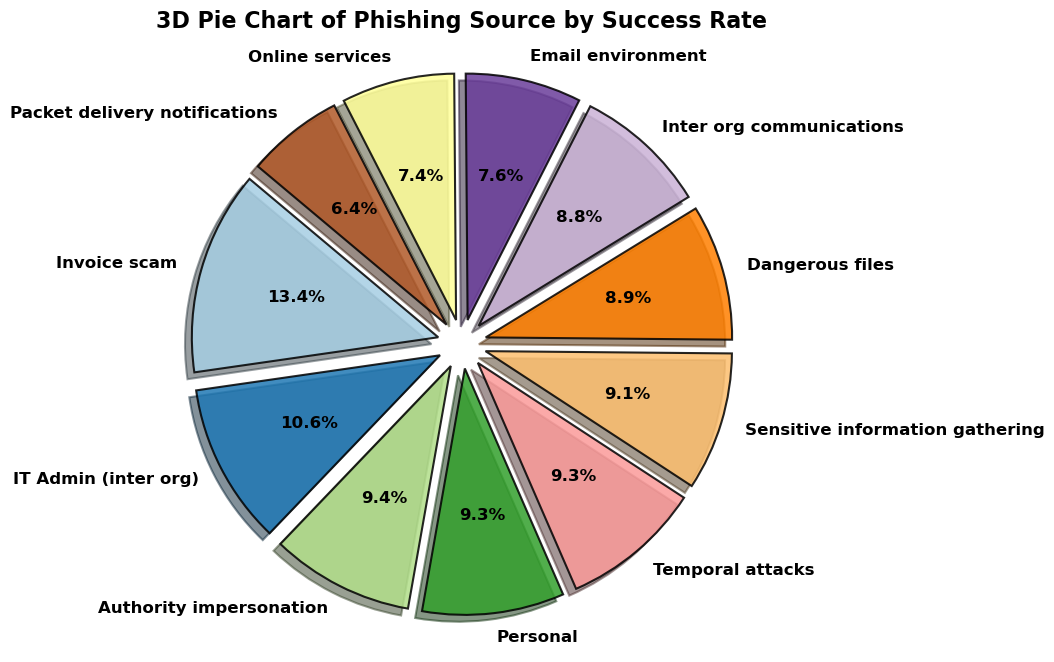

In [12]:
# Read the CSV file and sort by Success Rate (%)
df = pd.read_csv("Data/phishing_trends_extracted.csv")
df = df.sort_values(by="Success Rate (%)", ascending=False)

# Extract categories (Phishing Source) and Success Rate (%) for visualization
categories = df["Phishing Source"]
success_rates = df["Success Rate (%)"]

# Create pie chart and customize appearance (3D effect, colors, explosion)
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    success_rates, labels=categories, autopct='%1.1f%%', startangle=140,
    explode=[0.1] * len(categories), colors=plt.cm.Paired(np.linspace(0, 1, len(categories))),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'alpha': 0.85}, shadow=True
)

# Adjust font size and weight for better text visibility
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight("bold")

# Set the title and display the pie chart
ax.set_title("3D Pie Chart of Phishing Source by Success Rate", fontsize=16, fontweight="bold")
plt.show()

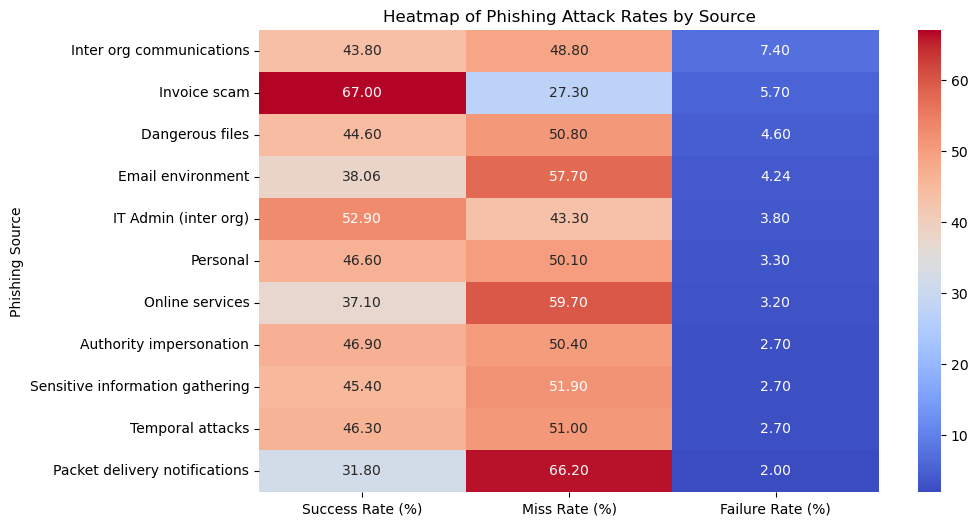

In [13]:
# Load the CSV data
df = pd.read_csv('Data/phishing_trends_extracted.csv')

# Set 'Phishing Source' as the index for easier visualization
df.set_index('Phishing Source', inplace=True)

# Create a heatmap of the numerical values (Success Rate, Miss Rate, Failure Rate)
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Set the title
plt.title('Heatmap of Phishing Attack Rates by Source')

# Show the plot
plt.show()

In [14]:
# Function to extract domain names from PDF text
def extract_domains_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        all_text = ""
        for page in pdf.pages:
            all_text += page.extract_text()  
    return all_text

# Regex pattern to extract domains (basic version that matches common domain patterns)
domain_pattern = re.compile(r"[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}")

# List of PDF file paths (assuming they're in the current directory)
pdf_files = [
    'Data/apwg_trends_report_q4_2023.pdf',
    'Data/apwg_trends_report_q4_2021.pdf',
    'Data/apwg_trends_report_q4_2020.pdf',
    'Data/apwg_trends_report_q3_2022.pdf'
]

data = []
# Loop through each PDF and extract domain names
for pdf_file in pdf_files:
    text = extract_domains_from_pdf(pdf_file)
    domains = domain_pattern.findall(text)  
    year = pdf_file.split("_")[-1].split(".")[0]  
    for domain in domains:
        data.append([year, domain])

In [15]:
# Create a dataframe from the aggregated data
df = pd.DataFrame(data, columns=['Year', 'Domain'])

# Save the dataframe to a CSV file
csv_file = 'Data/extracted_phishing_domains.csv'
df.to_csv(csv_file, index=False)
print(f"Data saved to {csv_file}")

# Display the DataFrame
display(df)

Data saved to Data/extracted_phishing_domains.csv


,Year,Domain
0,2023,www.apwg.org
1,2023,antiphishing.org
2,2023,apwg.orgPhishing
3,2023,apwg.orgPhishing
4,2023,www.interisle.net
...,...,...
145,2022,apwg.org
146,2022,APWG.EU
147,2022,www.ecrimeresearch.org
148,2022,www.apwg.org


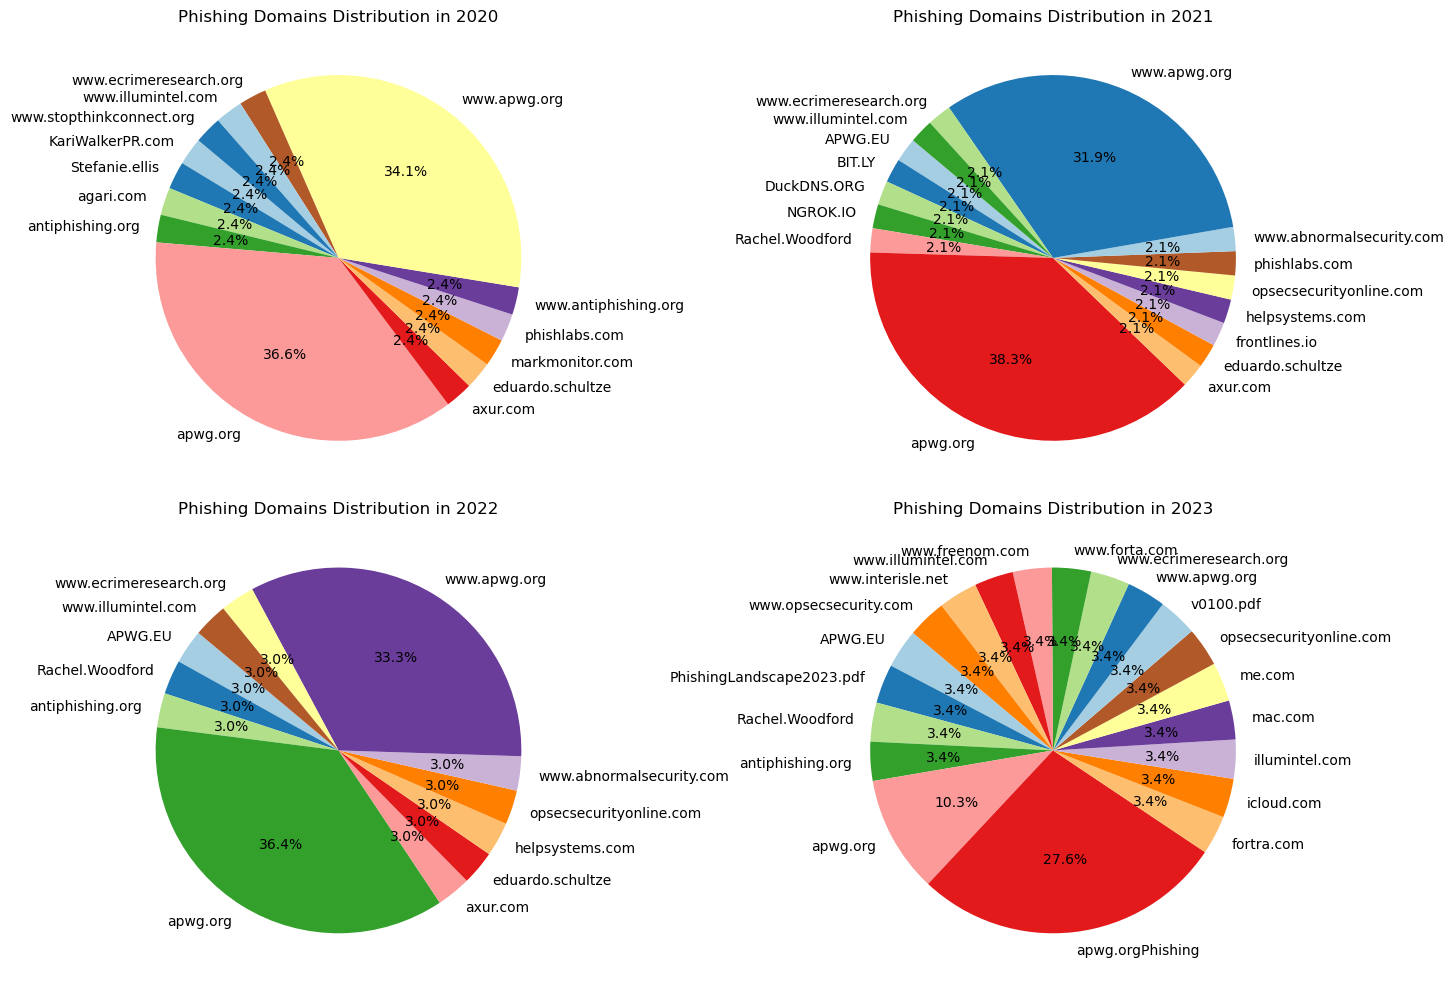

In [16]:
# Load the data from the CSV file and clean the column names
df = pd.read_csv('Data/extracted_phishing_domains.csv')
df.columns = df.columns.str.strip()  

# Group the data by 'Year' and 'Domain' and count the occurrences of each combination
domain_counts = df.groupby(['Year', 'Domain']).size().reset_index(name='Counts')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() 

# Loop over each year and create a pie chart for each year's data
for idx, year in enumerate(domain_counts['Year'].unique()):
    year_data = domain_counts[domain_counts['Year'] == year]
    domain_names = year_data['Domain']
    domain_counts_values = year_data['Counts']
    axes[idx].pie(domain_counts_values, labels=domain_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[idx].set_title(f'Phishing Domains Distribution in {year}')
plt.tight_layout()

# Display the final pie charts
plt.show()

### Sub-Question 3: “How do the demographic factors of the victims differ in Europe?”

In [17]:
# Load dataset
file1_path = "Data/fraud_experience_survey.csv"
file2_path = "Data/suspicion_behavior_survey.csv"

df_fraud = pd.read_csv(file1_path)
df_suspicion = pd.read_csv(file2_path)

# Standardizing category names
category_mapping = {
    "1. 18-34 years": "18-34 years",
    "2. 35-54 years": "35-54 years",
    "3. 55-64 years": "55-64 years",
    "4. 65+ years": "65+ years",
    "1. Male": "Male",
    "2. Female": "Female",
    "1. Low": "Low",
    "2. Medium": "Medium",
    "3. High": "High",
    "1. North": "North",
    "2. East": "East",
    "3. South": "South",
    "4. West": "West",
}

df_fraud["Category"] = df_fraud["Category"].replace(category_mapping)
df_suspicion["Category"] = df_suspicion["Category"].replace(category_mapping)


In [18]:
# Convert percentage columns to numeric values
def convert_percentage(column):
    return column.str.replace("%", "").astype(str).str.strip().astype(float)

for col in ["(NET percentages)", "Suspicious of Letters/Emails with Spelling/Grammar Mistakes"]:
    if col in df_fraud.columns:
        df_fraud[col] = convert_percentage(df_fraud[col])
    if col in df_suspicion.columns:
        df_suspicion[col] = convert_percentage(df_suspicion[col])

# Merge datasets on Category
df_combined = pd.merge(df_fraud, df_suspicion, on="Category", how="outer")

# Rename columns
df_combined.rename(
    columns={
        "(NET percentages)": "Fraud Experience (%)",
        "Suspicious of Letters/Emails with Spelling/Grammar Mistakes": "Suspicious of Phishing (%)",
    },
    inplace=True,
)

df_combined = df_combined[["Category", "Fraud Experience (%)", "Suspicious of Phishing (%)"]]

# Ensure numeric values
df_combined["Fraud Experience (%)"] = pd.to_numeric(df_combined["Fraud Experience (%)"], errors='coerce').fillna(0)
df_combined["Suspicious of Phishing (%)"] = pd.to_numeric(df_combined["Suspicious of Phishing (%)"], errors='coerce').fillna(0)


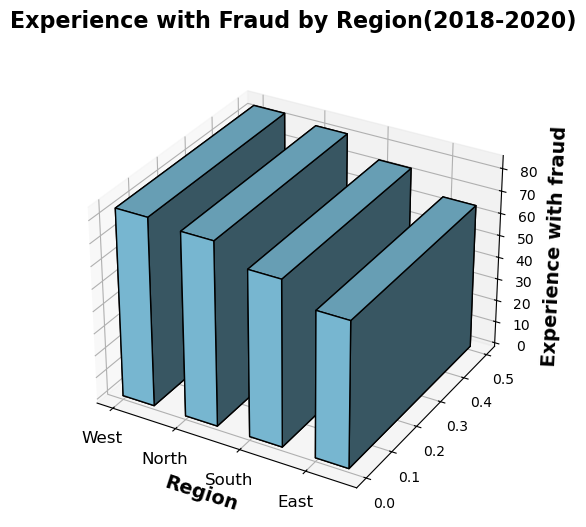

In [19]:
# Extract Region Data
df_region = df_combined[df_combined["Category"].isin(["North", "East", "South", "West"])].sort_values(by="Suspicious of Phishing (%)", ascending=False)

# 3D Bar Chart for Regions
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(df_region))
y_pos = np.zeros(len(df_region))
z_pos = np.zeros(len(df_region))

dx = np.full(len(x_pos), 0.5)
dy = np.full(len(x_pos), 0.5)
dz = df_region["Suspicious of Phishing (%)"].values

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue', edgecolor='black')

ax.set_xticks(x_pos)
ax.set_xticklabels(df_region["Category"], fontsize=12)
ax.set_xlabel("Region", fontsize=14, fontweight='bold')
ax.set_zlabel("Experience with fraud", fontsize=14, fontweight='bold')
ax.set_title("Experience with Fraud by Region(2018-2020)", fontsize=16, fontweight='bold', pad=20)

plt.show()

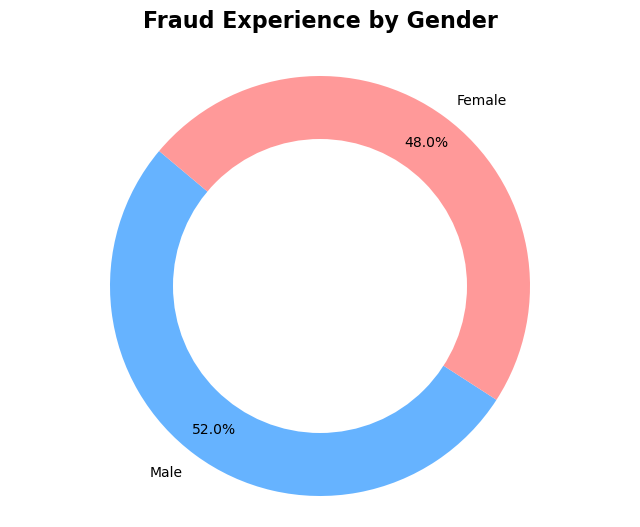

In [20]:
# Donut Chart for Gender
plt.figure(figsize=(8, 6))
df_gender = df_combined[df_combined["Category"].isin(["Male", "Female"])].sort_values(by="Fraud Experience (%)", ascending=False)

categories = df_gender["Category"]
values = df_gender["Fraud Experience (%)"]

wedges, texts, autotexts = plt.pie(
    values, labels=categories, autopct="%1.1f%%", startangle=140, pctdistance=0.85, colors=["#66b3ff", "#ff9999"]
)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

plt.title("Fraud Experience by Gender", fontsize=16, fontweight='bold', pad=20)
plt.axis("equal")
plt.show()

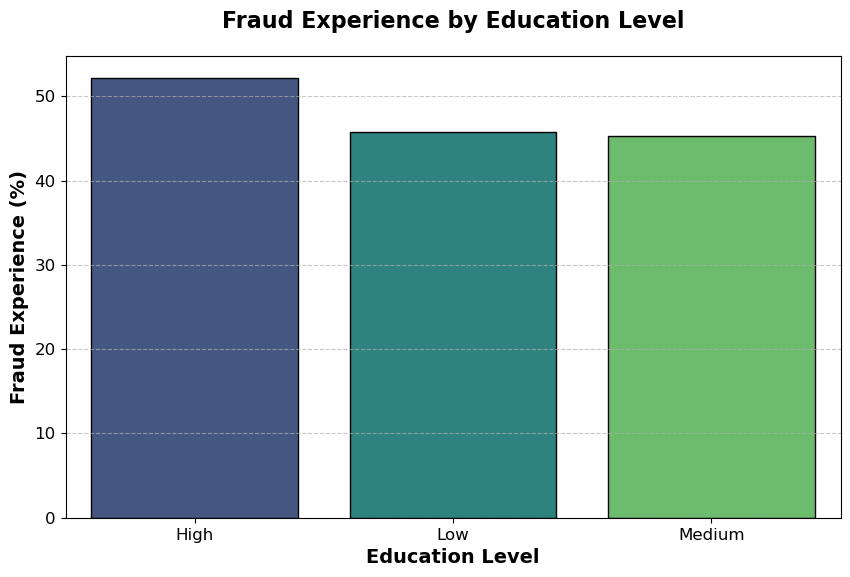

In [21]:
# Bar Chart for Fraud Experience by Education Level
plt.figure(figsize=(10, 6))
df_education = df_combined[df_combined["Category"].isin(["Low", "Medium", "High"])].sort_values(by="Fraud Experience (%)", ascending=False)

sns.barplot(x="Category", y="Fraud Experience (%)", data=df_education, hue="Category", palette="viridis", edgecolor="black", legend=False)

plt.xlabel("Education Level", fontsize=14, fontweight='bold')
plt.ylabel("Fraud Experience (%)", fontsize=14, fontweight='bold')
plt.title("Fraud Experience by Education Level", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

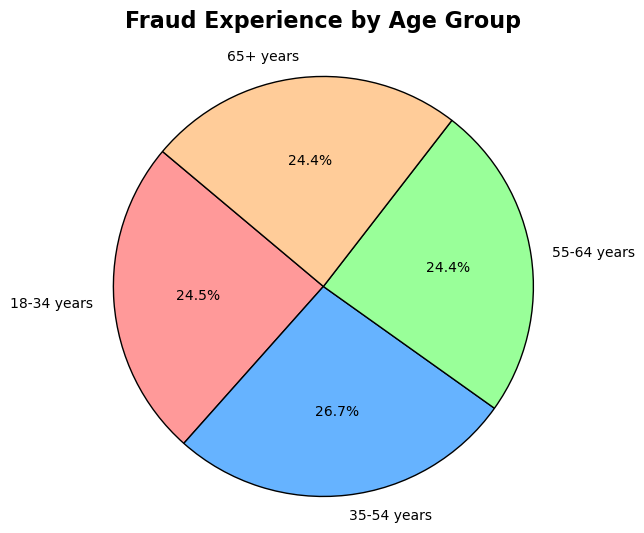

In [22]:
# Pie Chart for Fraud Experience by Age Group
plt.figure(figsize=(8, 6))
df_age = df_combined[df_combined["Category"].isin(["18-34 years", "35-54 years", "55-64 years", "65+ years"])].sort_values(by="Category")

plt.pie(df_age["Fraud Experience (%)"], labels=df_age["Category"], autopct="%1.1f%%", startangle=140, colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"], wedgeprops={'edgecolor': 'black'})

plt.title("Fraud Experience by Age Group", fontsize=16, fontweight='bold', pad=20)
plt.axis("equal")
plt.show()

### Sub-Question 4: “How effective are existing regional cybersecurity measures in preventing cyber attacks?”

In [23]:
### Load CSV
any_measure = pd.read_csv("Data/any_measure.csv")

In [24]:
### Cleaning the data
any_measure.replace({':': 'NVD'}, inplace=True)


cleaned_any_measures = any_measure[any_measure["geo"].isin(western_european_countries)][["geo", "TIME_PERIOD", "OBS_VALUE"]]
cleaned_file_path = "Data/clean_any_measure.csv"
cleaned_any_measures.to_csv(cleaned_file_path, index=False)


In [25]:
# Displaying the new csv file
display(cleaned_any_measures)

,geo,TIME_PERIOD,OBS_VALUE
1,Austria,2022,92.49
2,Austria,2024,95.38
5,Belgium,2022,95.80
6,Belgium,2024,96.12
13,Germany,2022,96.32
14,Germany,2024,96.50
23,Spain,2022,87.65
24,Spain,2024,89.92
29,France,2022,93.39
30,France,2024,93.20


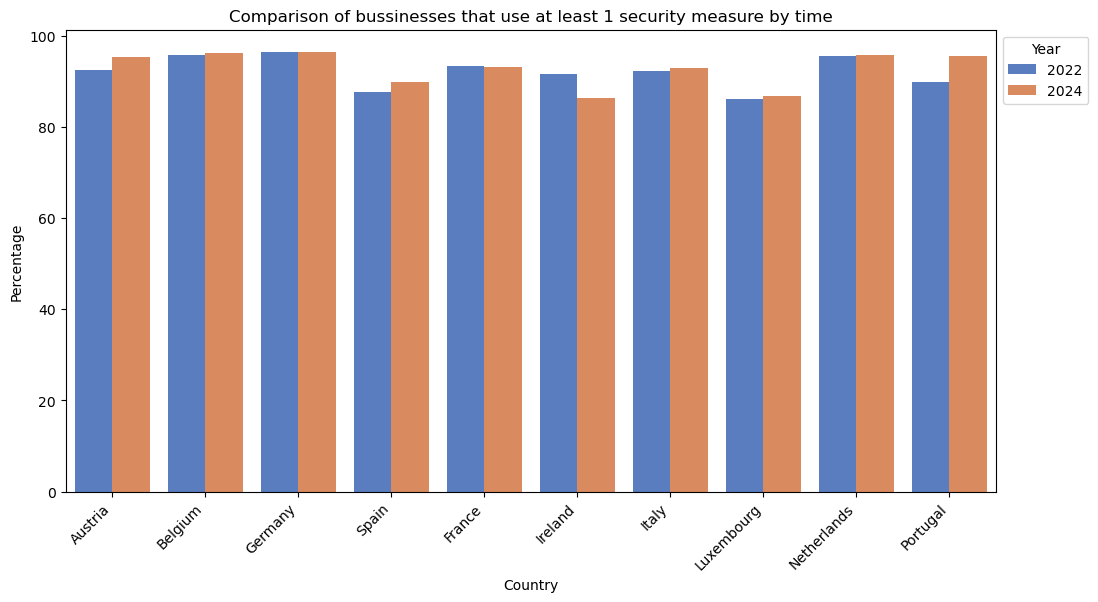

In [26]:
### Plot figure

# Convert TIME_PERIOD to string to avoid AttributeError
cleaned_any_measures["TIME_PERIOD"] = cleaned_any_measures["TIME_PERIOD"].astype(str)

#
plt.figure(figsize=(12, 6))
sns.barplot(x="geo", y="OBS_VALUE", hue="TIME_PERIOD", data=cleaned_any_measures, palette="muted")
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Comparison of bussinesses that use at least 1 security measure by time")

# Add the legend
plt.legend(title="Year", bbox_to_anchor=(1, 1), loc="upper left")

# Display the plot
plt.show()


In [27]:
## Load CSV file
make_csv("Data/Cyber_Info.xlsx", "Table1", "Data/Cyber_measures.csv")
measures =  pd.read_csv("Data/Cyber_measures.csv", skiprows=3, encoding='utf-8')


Sheet 'Table1' saved as 'Data/Cyber_measures.csv'


In [28]:
### Cleaning the csv file
# Rename second column as 'Country' and set proper headers
measures.columns = ["Index", "Country"] + measures.iloc[0, 2:].tolist()
measures = measures.iloc[1:].reset_index(drop=True)

# Drop index column
measures.drop(columns=["Index"], inplace=True)

# Filter for Western European countries
western_europe_measures = measures[measures["Country"].isin(western_european_countries)].copy()

# Convert numeric columns, replacing ":" with NaN
numeric_cols = western_europe_measures.columns.difference(["Country"])  # Exclude country column
western_europe_measures[numeric_cols] = western_europe_measures[numeric_cols].replace(":", None).apply(pd.to_numeric, errors="coerce")

# Save cleaned data
cleaned_file_path = "Data/clean_cyber_measures.csv"
western_europe_measures.to_csv(cleaned_file_path, index=False)

In [29]:
# Displaying the new csv file
display(western_europe_measures)

,Country,Use at least one ICT security measure,Make persons employed aware of their obligations in ICT security,"Have documents on measures, practices or procedures on ICT security",The enterprise's ICT security documents were defined or reviewed within the last 12 months,Experienced ICT related security incidents leading to some consequences in 2023
1,Belgium,96.12,62.82,40.31,NaN,22.28
5,Germany,96.50,68.02,40.25,25.69,25.07
7,Ireland,86.22,69.16,46.16,NaN,13.32
9,Spain,89.92,57.14,30.72,21.48,15.88
10,France,93.20,48.13,23.35,14.00,24.95
12,Italy,92.92,62.67,35.92,NaN,15.78
16,Luxembourg,86.80,54.12,29.93,NaN,16.67
19,Netherlands,95.75,50.01,41.51,32.23,25.75
20,Austria,95.38,61.07,29.10,20.72,11.52
22,Portugal,95.62,65.63,54.29,42.01,12.66


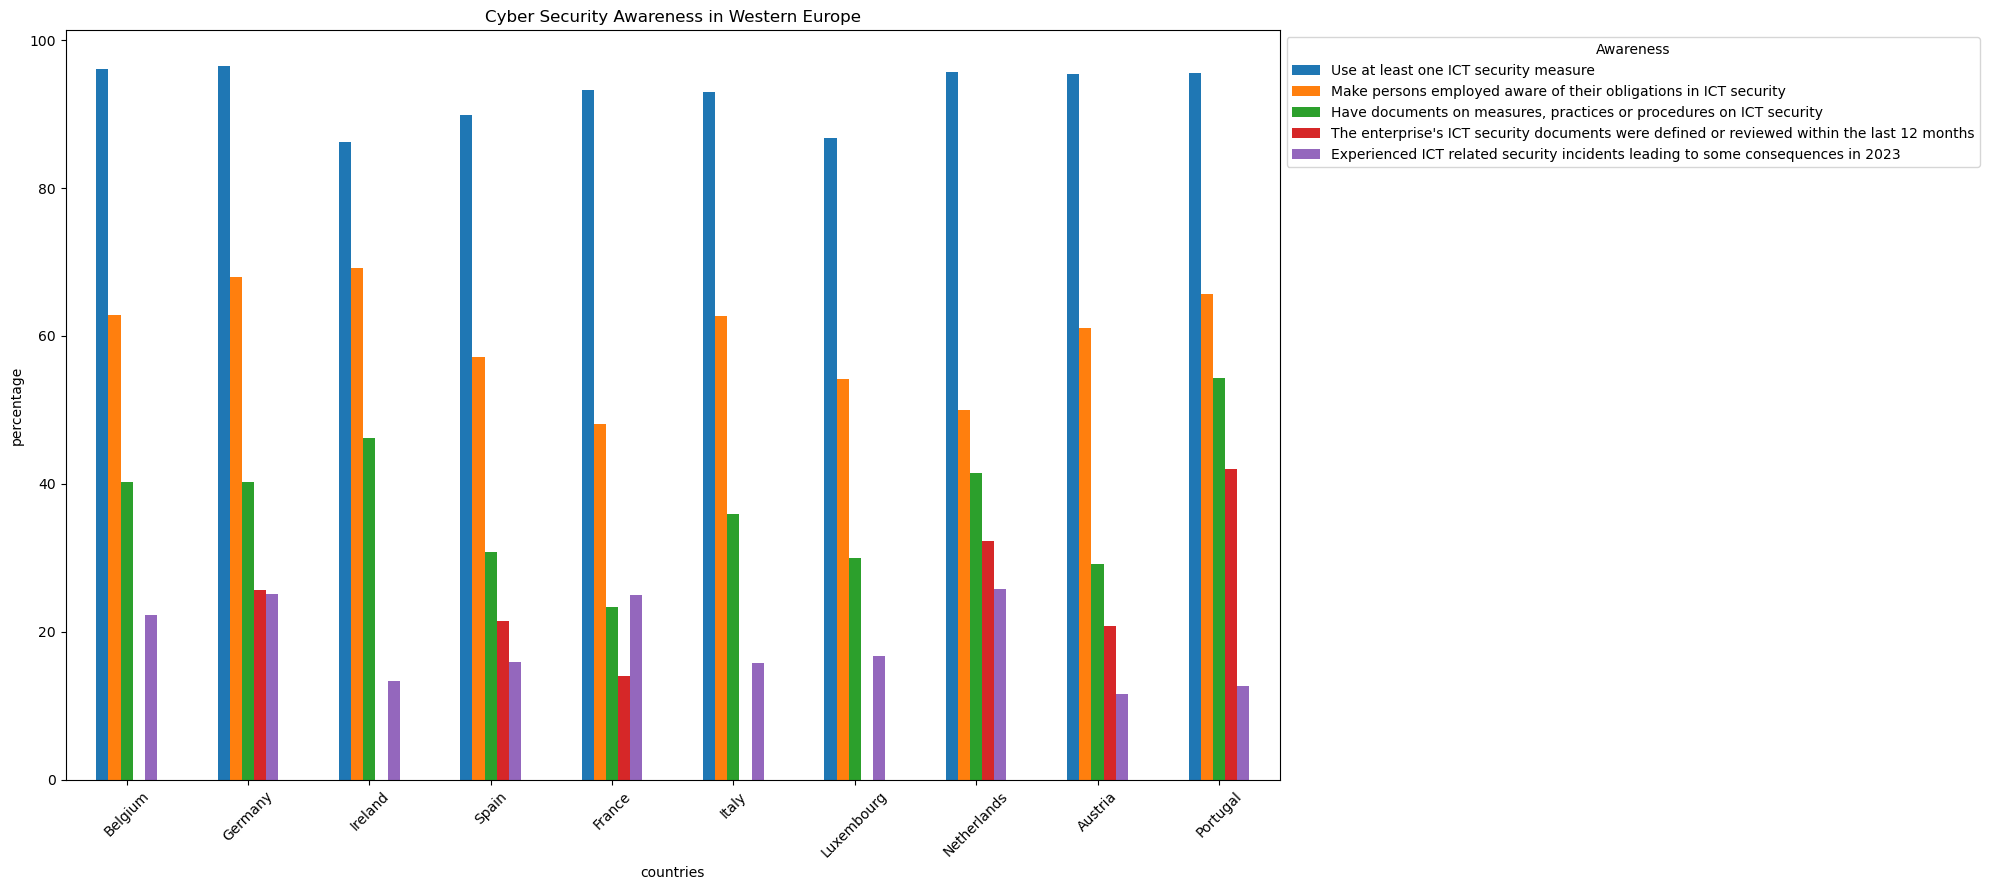

In [30]:
western_europe_measures.set_index("Country").plot(kind="bar", figsize=(20, 9))
plt.title('Cyber Security Awareness in Western Europe')
plt.ylabel('percentage')
plt.xlabel('countries')
plt.legend(title='Awareness', bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
password_usage =  pd.read_csv("Data/uses_strong_password.csv")

In [32]:
password_usage.replace({':': 'NVD'}, inplace=True)
cleaned_password = password_usage[password_usage["geo"].isin(western_european_countries)][["geo", "TIME_PERIOD", "OBS_VALUE"]]
cleaned_password.to_csv("Data/clean_uses_strong_password.csv", index=False)


In [33]:
# Displaying the new csv file
display(cleaned_password)

,geo,TIME_PERIOD,OBS_VALUE
1,Austria,2019,65.67
2,Austria,2022,79.95
3,Austria,2024,80.64
7,Belgium,2019,73.62
8,Belgium,2022,88.90
...,...,...,...
77,Netherlands,2024,82.79
84,Portugal,2019,84.89
85,Portugal,2022,84.09
86,Portugal,2024,88.58


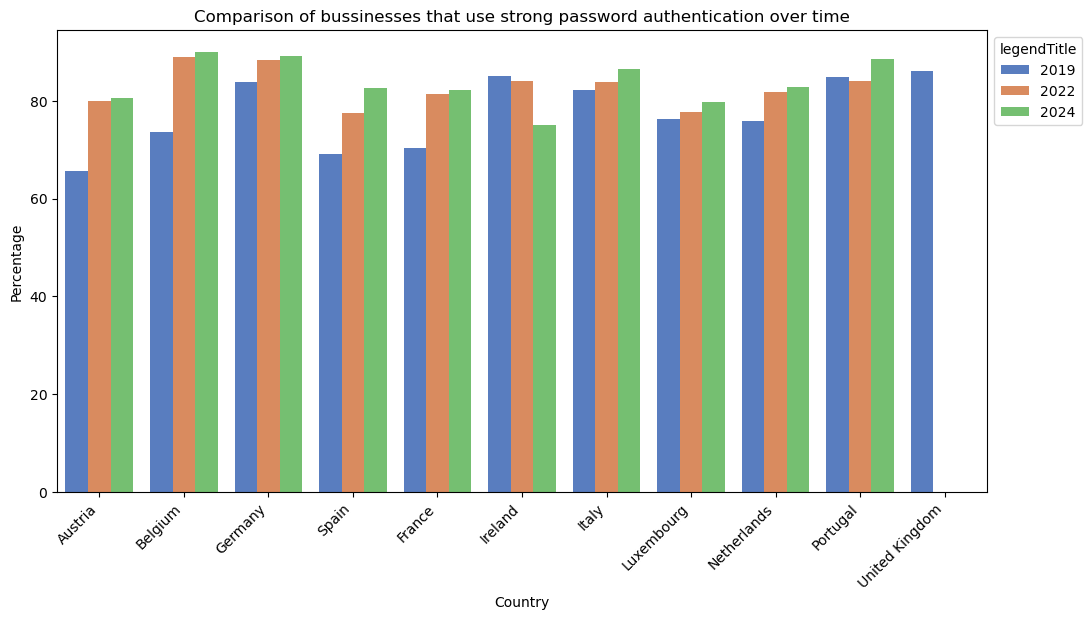

In [34]:
### Plot figure

# Convert TIME_PERIOD to string
cleaned_password["TIME_PERIOD"] = cleaned_password["TIME_PERIOD"].astype(str)

#
plt.figure(figsize=(12, 6))
sns.barplot(x="geo", y="OBS_VALUE", hue="TIME_PERIOD", data=cleaned_password, palette="muted")
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Comparison of bussinesses that use strong password authentication over time")

# Add the legend
plt.legend(title="legendTitle", bbox_to_anchor=(1, 1), loc="upper left")

# Display the plot
plt.show()

In [35]:
# Load the data
file1_path = "Data/clean_cyber_measures.csv"
file2_path = "Data/clean_uses_strong_password.csv"
file3_path = "Data/percentage_bussinesses_attacked.csv"

df_cyber_measures = pd.read_csv(file1_path)
df_strong_password = pd.read_csv(file2_path)
df_attacks = pd.read_csv(file3_path)

# Filter the strong password dataset to only include 2024 data
df_strong_password_2024 = df_strong_password[df_strong_password["TIME_PERIOD"] == 2024][["geo", "OBS_VALUE"]]
df_strong_password_2024.rename(columns={"geo": "Country", "OBS_VALUE": "Uses Strong Password (%)"}, inplace=True)

# Filter the attacks dataset to only include 2024 data
df_attacks_2024 = df_attacks[df_attacks["TIME_PERIOD"] == 2024][["geo", "OBS_VALUE"]]
df_attacks_2024.rename(columns={"geo": "Country", "OBS_VALUE": "Percentage of Businesses Attacked"}, inplace=True)

# Merge all data into a single table based on the country column
df_merged = df_cyber_measures.merge(df_strong_password_2024, on="Country", how="inner") \
                             .merge(df_attacks_2024, on="Country", how="inner")

# Creating a new csv file with the merged data
df_merged.to_csv("Data/merged_cybersecurity_data.csv", index=False)

In [36]:
# Displaying the new csv file
display(df_merged)

,Country,Use at least one ICT security measure,Make persons employed aware of their obligations in ICT security,"Have documents on measures, practices or procedures on ICT security",The enterprise's ICT security documents were defined or reviewed within the last 12 months,Experienced ICT related security incidents leading to some consequences in 2023,Uses Strong Password (%),Percentage of Businesses Attacked
0,Belgium,96.12,62.82,40.31,NaN,22.28,90.00,22.28
1,Germany,96.50,68.02,40.25,25.69,25.07,89.14,25.07
2,Ireland,86.22,69.16,46.16,NaN,13.32,75.05,13.32
3,Spain,89.92,57.14,30.72,21.48,15.88,82.54,15.88
4,France,93.20,48.13,23.35,14.00,24.95,82.18,24.95
5,Italy,92.92,62.67,35.92,NaN,15.78,86.60,15.78
6,Luxembourg,86.80,54.12,29.93,NaN,16.67,79.80,16.67
7,Netherlands,95.75,50.01,41.51,32.23,25.75,82.79,25.75
8,Austria,95.38,61.07,29.10,20.72,11.52,80.64,11.52
9,Portugal,95.62,65.63,54.29,42.01,12.66,88.58,12.66


<Figure size 1600x800 with 0 Axes>

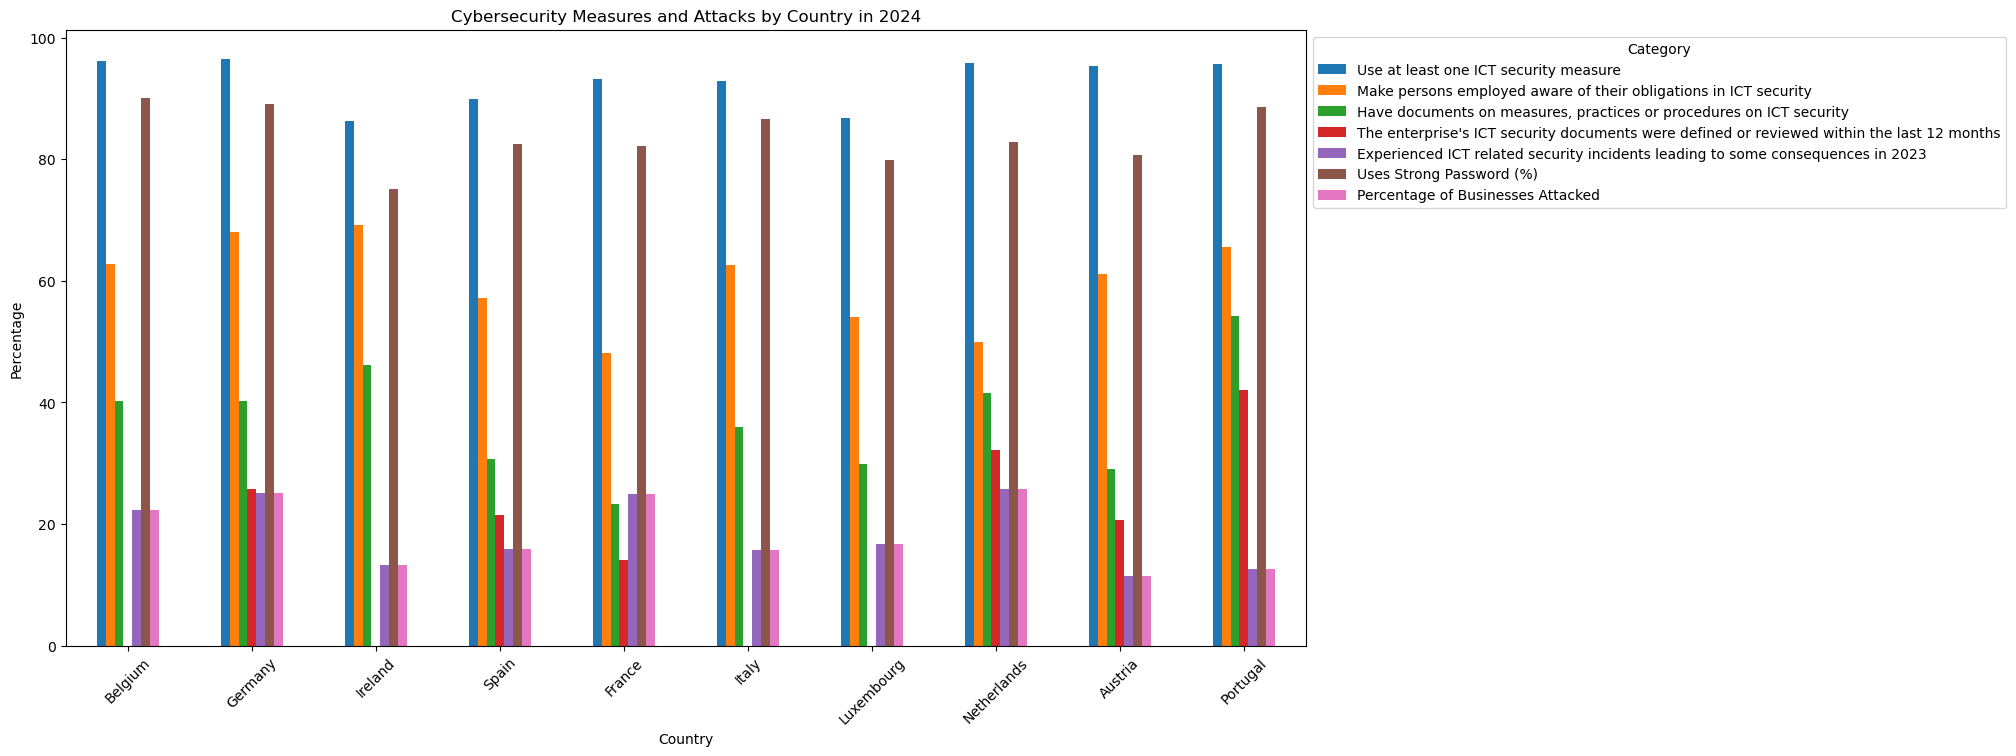

In [37]:
# Plot the data
plt.figure(figsize=(16, 8))
df_merged.set_index("Country").plot(kind="bar", figsize=(16,8))

# Customizing the plot
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Cybersecurity Measures and Attacks by Country in 2024")
plt.xticks(rotation=45)
plt.legend(title="Category", loc="upper left", bbox_to_anchor=(1,1))

# Show the plot
plt.show()

### Sub-Question 5: “What are the implications of rising cybercrime severity for asset management in key sectors?”

In [38]:
# Read CSV file
df = pd.read_csv("Data/Sectors data.csv")
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════════════════════╤═══════════╕
│    │ category                             │   Percent │
╞════╪══════════════════════════════════════╪═══════════╡
│  0 │ Banking                              │        11 │
├────┼──────────────────────────────────────┼───────────┤
│  1 │ Communications                       │        22 │
├────┼──────────────────────────────────────┼───────────┤
│  2 │ Digital infrastructure               │         6 │
├────┼──────────────────────────────────────┼───────────┤
│  3 │ Digital services                     │         2 │
├────┼──────────────────────────────────────┼───────────┤
│  4 │ Drinking Water Supply & Distribution │         2 │
├────┼──────────────────────────────────────┼───────────┤
│  5 │ Energy                               │         9 │
├────┼──────────────────────────────────────┼───────────┤
│  6 │ Finance                              │         1 │
├────┼──────────────────────────────────────┼───────────┤
│  7 │ Governm

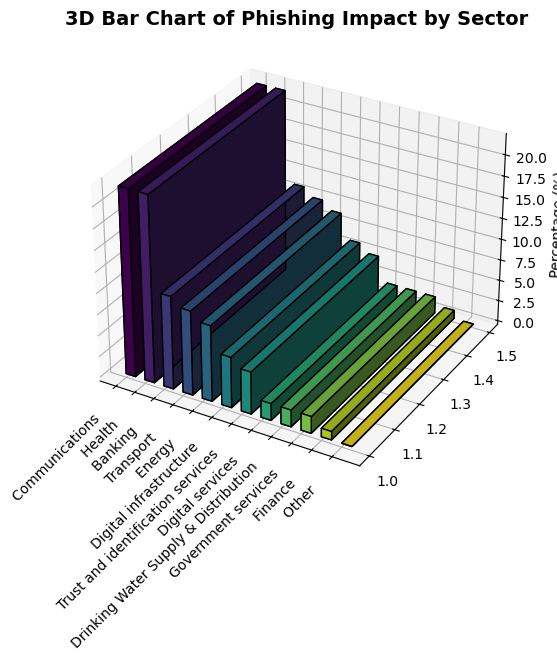

In [39]:
# Read the data and sorting 
df = pd.read_csv('Data/Sectors data.csv')
df_sorted = df.sort_values(by='Percent', ascending=False)

# Setting up the figure and 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define positions for the bars
x_pos = range(len(df_sorted))
y_pos = [1] * len(df_sorted) 
z_pos = [0] * len(df_sorted)  

# Define the width, depth, and height of each bar
dx = [0.5] * len(df_sorted)  
dy = [0.5] * len(df_sorted)  
dz = df_sorted['Percent']  
colors = plt.cm.viridis(np.linspace(0, 1, len(df_sorted)))
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, edgecolor='black')

# Set labels and title
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('Percentage (%)')
ax.set_title('3D Bar Chart of Phishing Impact by Sector', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_sorted['category'], rotation=45, ha='right')

plt.show()

In [40]:
# Read CSV file
df = pd.read_csv("Data/assets.csv")
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════════════════╤═════════╕
│    │ category                   │   value │
╞════╪════════════════════════════╪═════════╡
│  0 │ Other                      │ 90      │
├────┼────────────────────────────┼─────────┤
│  1 │ Servers/domain controllers │ 30.6079 │
├────┼────────────────────────────┼─────────┤
│  2 │ Website                    │ 21.8855 │
├────┼────────────────────────────┼─────────┤
│  3 │ App                        │ 20.4581 │
├────┼────────────────────────────┼─────────┤
│  4 │ Workstations               │ 18.6344 │
╘════╧════════════════════════════╧═════════╛


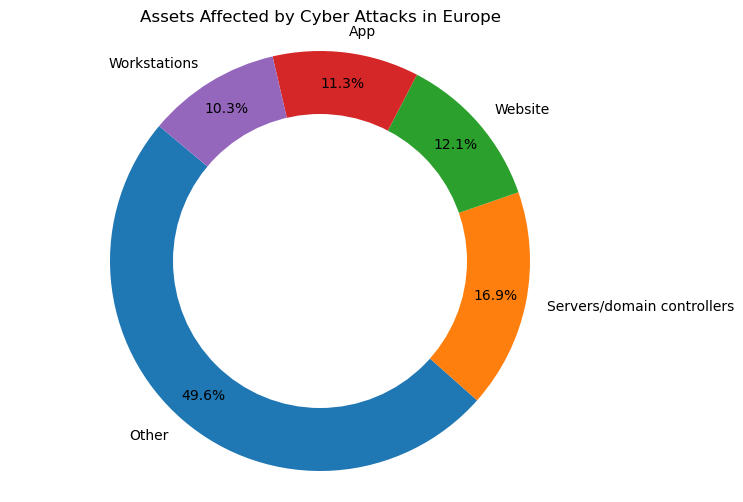

In [41]:
#Read CSV file
df = pd.read_csv("Data/assets.csv")

# Extract categories and values
categories = df["category"]
values = df["value"]

# Create Donut Chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    values, labels=categories, autopct="%1.1f%%", startangle=140, pctdistance=0.85
)
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

# Improve layout
plt.title("Assets Affected by Cyber Attacks in Europe")
plt.axis("equal") 


plt.show()

In [42]:
# Read CSV file
df = pd.read_csv("Data/severity.csv")
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════╤══════╤═════════╤═════════╤══════════════╕
│    │   category │   No │   Minor │   Large │   Very large │
╞════╪════════════╪══════╪═════════╪═════════╪══════════════╡
│  0 │       2020 │   50 │     177 │      89 │           95 │
├────┼────────────┼──────┼─────────┼─────────┼──────────────┤
│  1 │       2021 │   50 │     204 │     127 │           77 │
├────┼────────────┼──────┼─────────┼─────────┼──────────────┤
│  2 │       2022 │  618 │     205 │     121 │           76 │
├────┼────────────┼──────┼─────────┼─────────┼──────────────┤
│  3 │       2023 │  569 │     364 │     152 │           92 │
├────┼────────────┼──────┼─────────┼─────────┼──────────────┤
│  4 │       2024 │    3 │      20 │      19 │           21 │
╘════╧════════════╧══════╧═════════╧═════════╧══════════════╛


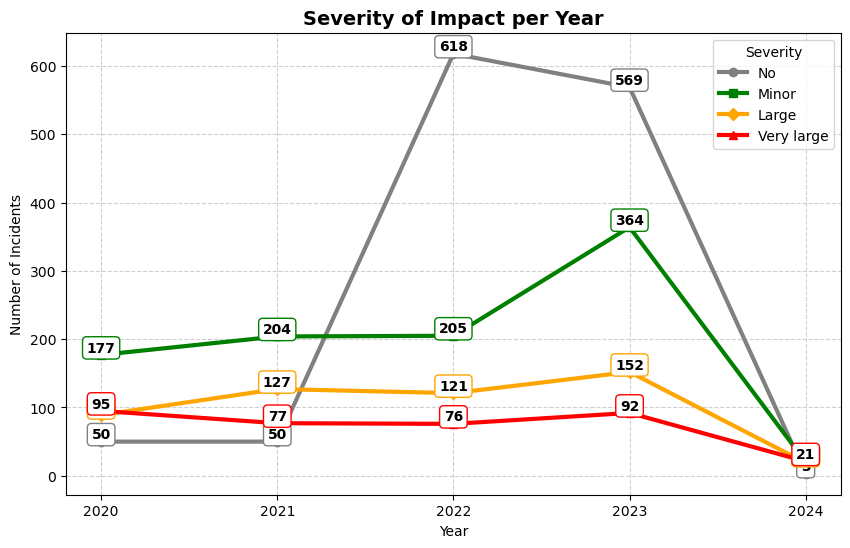

In [43]:
# Read the CSV file
df = pd.read_csv("Data/severity.csv")

# Ensure the first column is treated as the index (years)
df.set_index(df.columns[0], inplace=True)

# Plot
plt.figure(figsize=(10, 6))
colors = ["gray", "green", "orange", "red"]
markers = ["o", "s", "D", "^"]
for i, severity in enumerate(df.columns):
    plt.plot(df.index, df[severity], marker=markers[i], color=colors[i], 
             label=severity, linewidth=3)
    for x, y in zip(df.index, df[severity]):
        plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom', fontweight="bold",
                 bbox=dict(facecolor='white', edgecolor=colors[i], boxstyle='round,pad=0.3'))

# Customization
plt.title("Severity of Impact per Year", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.xticks(df.index) 
plt.legend(title="Severity", loc="upper right")
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()